# Load Dataset

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('Acoustic Features.csv')

## **Pre-processing**

**Normalisasi data dengan Z-score**
$$ X(stand) = \frac{x - mean (x)}{std_\text{dev}} $$
dimana $${mean = 0}, {std_\text{dev}} = 1 $$

In [4]:
def normalize(data, i):
    # Initialize a list to store the means of each column
    means = [0] * i
    # Initialize a list to store the standard deviations of each column
    stds = [1] * i
    # Loop through the columns
    for j in range(i):
        # Compute the mean of the column
        mean = data.iloc[:, j].mean()
        # Compute the standard deviation of the column
        std = data.iloc[:, j].std()
        # Store the mean and standard deviation
        means[j] = mean
        stds[j] = std
    # Loop through the rows
    for index, row in data.iterrows():
        # Loop through the columns
        for j in range(i):
            # Normalize the value by subtracting the mean and dividing by the standard deviation
            row[j] = (row[j] - means[j]) / stds[j]
    # Return the normalized data
    return data

In [5]:
# drop duplicate
df = df.drop_duplicates(keep='first')

In [6]:
# Split feature and target
X = df.drop(columns=['Class'])
y = df['Class']

In [7]:
X = normalize(X,50)
X

C:\Users\Victus\AppData\Local\Temp\ipykernel_2328\1967259291.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[j] = (row[j] - means[j]) / stds[j]
C:\Users\Victus\AppData\Local\Temp\ipykernel_2328\1967259291.py:20: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  row[j] = (row[j] - means[j]) / stds[j]


,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,-1.272863,0.724549,0.910332,0.184485,1.940591,0.533531,1.342709,0.176184,0.194331,0.383737,...,0.207447,1.143513,-1.063516,-0.825846,-0.221041,1.447311,0.166633,-0.794990,-2.447998,0.849226
1,-0.141269,-2.270546,-0.198455,0.542841,2.017159,0.817391,0.998348,1.320472,1.910184,3.700735,...,-1.057144,1.143513,-1.088927,1.695816,-0.779237,0.384200,-0.791482,1.701411,-0.935784,0.074540
2,-1.365871,1.670369,1.561337,1.891824,0.406721,1.535389,0.042915,1.076549,0.532379,0.490894,...,-0.514324,0.435849,-1.038105,1.741509,1.525571,2.255275,1.278046,-0.101486,-1.074519,-0.958374
3,0.013743,0.961004,1.499939,-1.697403,0.489565,2.739475,0.414284,1.155465,-0.881279,0.505506,...,-0.949773,1.143513,-0.577529,1.047552,1.687627,1.532360,0.396581,-1.524938,-0.366969,0.332769
4,-1.055845,0.724549,1.196106,-1.024616,0.961525,0.283066,1.096254,0.240752,1.285306,1.197156,...,-1.051179,-0.516990,2.087458,-1.111424,0.301142,1.447311,0.846895,-1.102619,-1.324242,-2.507745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.618294,0.468390,-0.837272,1.098253,0.670316,-0.019347,0.772150,0.061397,0.419696,0.315546,...,0.052356,0.692168,0.222920,-0.757307,-0.094997,-1.125418,1.143910,0.980038,1.353348,0.590997
396,0.649296,-1.107976,-0.937947,1.645996,0.425549,-0.414524,-0.497260,-0.143068,-0.789084,-0.001054,...,-1.003458,1.143513,0.943959,-1.085722,-1.715565,-1.401827,1.383439,1.701411,1.519830,0.074540
397,0.819810,0.054594,-1.081512,0.301685,-0.977778,0.910155,1.319076,-0.508954,0.312135,0.851331,...,-0.908018,-1.129927,-0.177304,-0.825846,-1.067338,-0.763960,1.057680,1.701411,0.687419,-1.216602
398,0.091250,0.369867,-1.196183,-0.298621,-0.569834,-0.529552,0.691124,0.215643,0.117501,0.110973,...,-0.654503,1.143513,-0.123306,-0.714470,-0.923287,-1.040369,0.578622,1.701411,0.576431,0.590997


### **One-hot Encoding for y**

In [8]:
y = pd.get_dummies(y, columns = ['Class'])
y

,angry,happy,relax,sad
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
395,True,False,False,False
396,True,False,False,False
397,True,False,False,False
398,True,False,False,False


# **Training**

Sebelum melakukan training, pada bagian ini dibuatkan beberapa class dan definisi function untuk menunjang pembuatan layer Neural Network. Class yang dibuat diantaranya:
1. Layer: Menginisiasi <i>layer</i> yang akan dibuat.
2. FCLayer: Membuat <i>layer</i> yang ditugaskan untuk melakukan <i>feed forward</i>, <i>backpropagation</i>, dan memperbaharui parameter <i>weight</i> dan <i>bias</i> dengan algoritma Gradient Descent.
3. Activation Layer: Membuat <i>layer</i> yang berisi fungsi aktivasi.
4. NeuralNetwork: Menampung <i>layer neural network</i> yang akan dibangun.

## **Fungsi Aktivasi & Loss:**
Disediakan pilihan fungsi aktivasi beserta turunan pertamanya.

- Sigmoid:
$$\sigma(x) = \frac{1}{1 + e^{-x}} $$
$$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$
- Softmax:
$${softmax}(x_i) = \frac{e^{x_i - \max(x)}}{\sum{e^{x - \max(x)}}} $$
$$ softmax'(x) = {softmax}(x_i) \cdot (1 - {softmax}(x_i))$$
- ReLU
$${ReLU}(x) = \max(0, x) $$
$${ReLU}'(x) = \begin{cases} 1 & \text{jika } x > 0 \\ 0 & \text{jika } x \leq 0 \end{cases} $$


**Loss Function:**
- Categorical Cross-Entropy:
$${CCE}(y_{\text{true}}, y_{\text{pred}}) = -\frac{1}{N} \sum{y_{\text{true}} \cdot \log(y_{\text{pred}})} $$
- Turunan Categorical Cross-Entropy:
   $${CCE}'(y_{\text{true}}, y_{\text{pred}}) = -\frac{y_{\text{true}}}{y_{\text{pred}}}$$


In [9]:
# Import numpy for numerical operations
import numpy as np

# Define the activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Define the loss functions and their derivatives
def categorical_crossentropy(y_true, y_pred):
    # Clip the predictions to avoid log(0) error
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Compute the cross entropy
    return -np.mean(y_true * np.log(y_pred))

def categorical_crossentropy_derivative(y_true, y_pred):
    # Clip the predictions to avoid division by zero error
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Compute the derivative of cross entropy
    return - (y_true / y_pred)

## Class Layer:

In [10]:
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

## Class FCLayer:

Algoritma optimasi Gradient Descend diimplementasikan pada layer ini dengan persamaan
$${w}{_{\text{new}}} = {w}{_{\text{current}}} - \alpha \cdot \frac{dL}{dw}$$
$${b}{_{\text{new}}} = {b}{_{\text{current}}} - \alpha \cdot \frac{dL}{db}$$

Nilai turunan Loss terhadap tiap parameter didapatkan dari <i> backward propagation </i>

In [11]:
# Define the class for a layer of the neural network
class FCLayer(Layer):
    # Initialize the layer with the number of inputs, outputs, activation function, and weight initialization method
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size,output_size) - 0.5
        self.bias = np.random.rand(1,output_size) - 0.5
    # propagate prediction from given input
    def forward(self,input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output
    # backward propagation, computes dE/dW, dE/dB for given output_error=dE/dY. returns input_error=dE/dX
    def backward(self,output_error,learning_rate):
        input_error = np.dot(output_error,self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error


## Class Activation Layer:

In [12]:
# inherit base class Layer
class ActivationLayer(Layer):
    def __init__(self,activation,activation_derivative):
        self.activation = activation
        self.activation_derivative = activation_derivative
    # returns activated input
    def forward(self,input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output
    # returns input_error=dE/dX for given output_error-dE/dY
    # learning_rate is not used because it is not learnable param
    def backward(self,output_error,learning_rate):
        return self.activation_derivative(self.input) * output_error

## Class Neural Network:

In [13]:
# Define the class for the neural network
class NeuralNetwork:
    # Initialize the neural network with the number of features, the number of outputs, the loss function, and the optimizer
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_derivative = None
    # add layer
    def add(self,layer):
        self.layers.append(layer)
    #set loss
    def use(self,loss,loss_derivative):
        self.loss = loss
        self.loss_derivative = loss_derivative
    #predict output
    def predict(self,input_data):
        #sample dimension first
        sample = len(input_data)
        result = []
        
        #run network over samples
        for i in range(samples):
            #forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward(output)
            result.append(output)
        return result
    #train network
    def train(self, x_train, y_train, epochs, learning_rate):
        #sample dimension first
        samples = len(x_train)
        #train loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward(output)
                #compute loss
                err += self.loss(y_train[j],output)
                #backward prop
                error = self.loss_derivative(y_train[j],output)
                for layer in reversed(self.layers):
                    error = layer.backward(error,learning_rate)
            #calculate average error
            err /= samples
            print('epoch %d%d error = %f' % (i+1,epochs,err))

## Train

In [14]:
# Convert data to trainable dimension
x_train = X.values[:,np.newaxis,:]
y_train = y.values[:,np.newaxis,:]

NN yang digunakan memiliki 3 layer, yaitu:
1. Layer Input berisi 50 node
2. Hidden Layer berisi 32 node dengan fungsi aktivasi ReLU
3. Output Layer berisi 4 node dengan fungsi aktivasi softmax

Nilai learning rate yang digunakan adalah 0.1 dan iterasi sebanyak 100 kali

In [15]:
# network
net = NeuralNetwork()
net.add(FCLayer(50,32))
net.add(ActivationLayer(relu,relu_derivative))
net.add(FCLayer(32,4))
net.add(ActivationLayer(softmax,softmax_derivative))

print(x_train)
print(y_train)
# train
net.use(categorical_crossentropy, categorical_crossentropy_derivative)
net.train(x_train, y_train, epochs=100, learning_rate=0.1)
# test
#out = net.predict(x_train)
#print(out)

[[[-1.27286325  0.72454933  0.91033152 ... -0.79499    -2.44799769
    0.84922559]]

 [[-0.14126944 -2.27054575 -0.19845525 ...  1.70141098 -0.93578353
    0.07454018]]

 [[-1.36587096  1.67036883  1.56133744 ... -0.10148573 -1.07451877
   -0.95837371]]

 ...

 [[ 0.81981023  0.05459386 -1.08151181 ...  1.70141098  0.68741883
   -1.21660218]]

 [[ 0.09124983  0.36986702 -1.19618276 ...  1.70141098  0.57643064
    0.59099712]]

 [[-0.74581956 -1.56118112 -0.80205782 ... -1.21730944  1.08975104
   -0.44191676]]]
[[[False False  True False]]

 [[False False  True False]]

 [[False False  True False]]

 ...

 [[ True False False False]]

 [[ True False False False]]

 [[ True False False False]]]
epoch 1100 error = 0.169533
epoch 2100 error = 1.353360
epoch 3100 error = 1.721265
epoch 4100 error = 1.670132
epoch 5100 error = 1.665672
epoch 6100 error = 2.173073
epoch 7100 error = 2.108230
epoch 8100 error = 2.108230
epoch 9100 error = 2.108230
epoch 10100 error = 2.108230
epoch 11100 error

# Uji Coba dengan PCA

Dalam uji coba ini, langkah yang dilakukan setelah data dinormalisasi ialah PCA untuk mencari fitur yang relevan. Perhitungan dalam PCA dilakukan dengan membuat class bernama do_pca yang berisi langkah-langkah di bawah ini:

- menghitung covariance matrix
\begin{align}
        Cov (\sum) = \begin{pmatrix}
        cov (x_1,x_1) & cov(x_1,x_2) & ... & cov(x_1,x_m) \\
        | & | & | & | \\
        cov (x_m,x_1) & cov(x_m,x_2) & ... & cov(x_m,x_m)
        \end{pmatrix}
\end{align}
  
  di mana \(X\) adalah matriks data yang memiliki dimensi \(n x m\), dengan \(n\) adalah jumlah sampel dan \(m\) adalah jumlah fitur.
- menghitung eigenvalue dan eigenvector
$$ AX = λX $$

In [16]:
# Import numpy and pandas libraries
import numpy as np
import pandas as pd

# Define a function to do a PCA
def do_pca(data, n_components):
  # data: a numpy array of shape (n_samples, n_features)
  # n_components: an integer specifying the number of principal components to keep
  # returns: a numpy array of shape (n_samples, n_components) containing the projected data

  # Calculate the covariance matrix of the data
  cov_matrix = np.cov(data.T)

  # Calculate the eigenvalues and eigenvectors of the covariance matrix
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Sort the eigenvalues and eigenvectors in descending order
  idx = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:, idx]

  # Select the first n_components eigenvectors as the principal components
  pc = eigenvectors[:, :n_components]

  # Project the data onto the principal components
  transformed_data = np.dot(data, pc)

  # Return the transformed data
  return transformed_data

## Reduction for highly corellated data

Setelah melakukan perhitungan matriks korelasi, heatmap digambarkan dan dilihat secara total fitur apa yang memiliki korelasi tinggi. Kode dibawah hanya menampilkan korelasi heatmap untuk data yang memiliki korelasi tinggi diatas 0.8

In [17]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


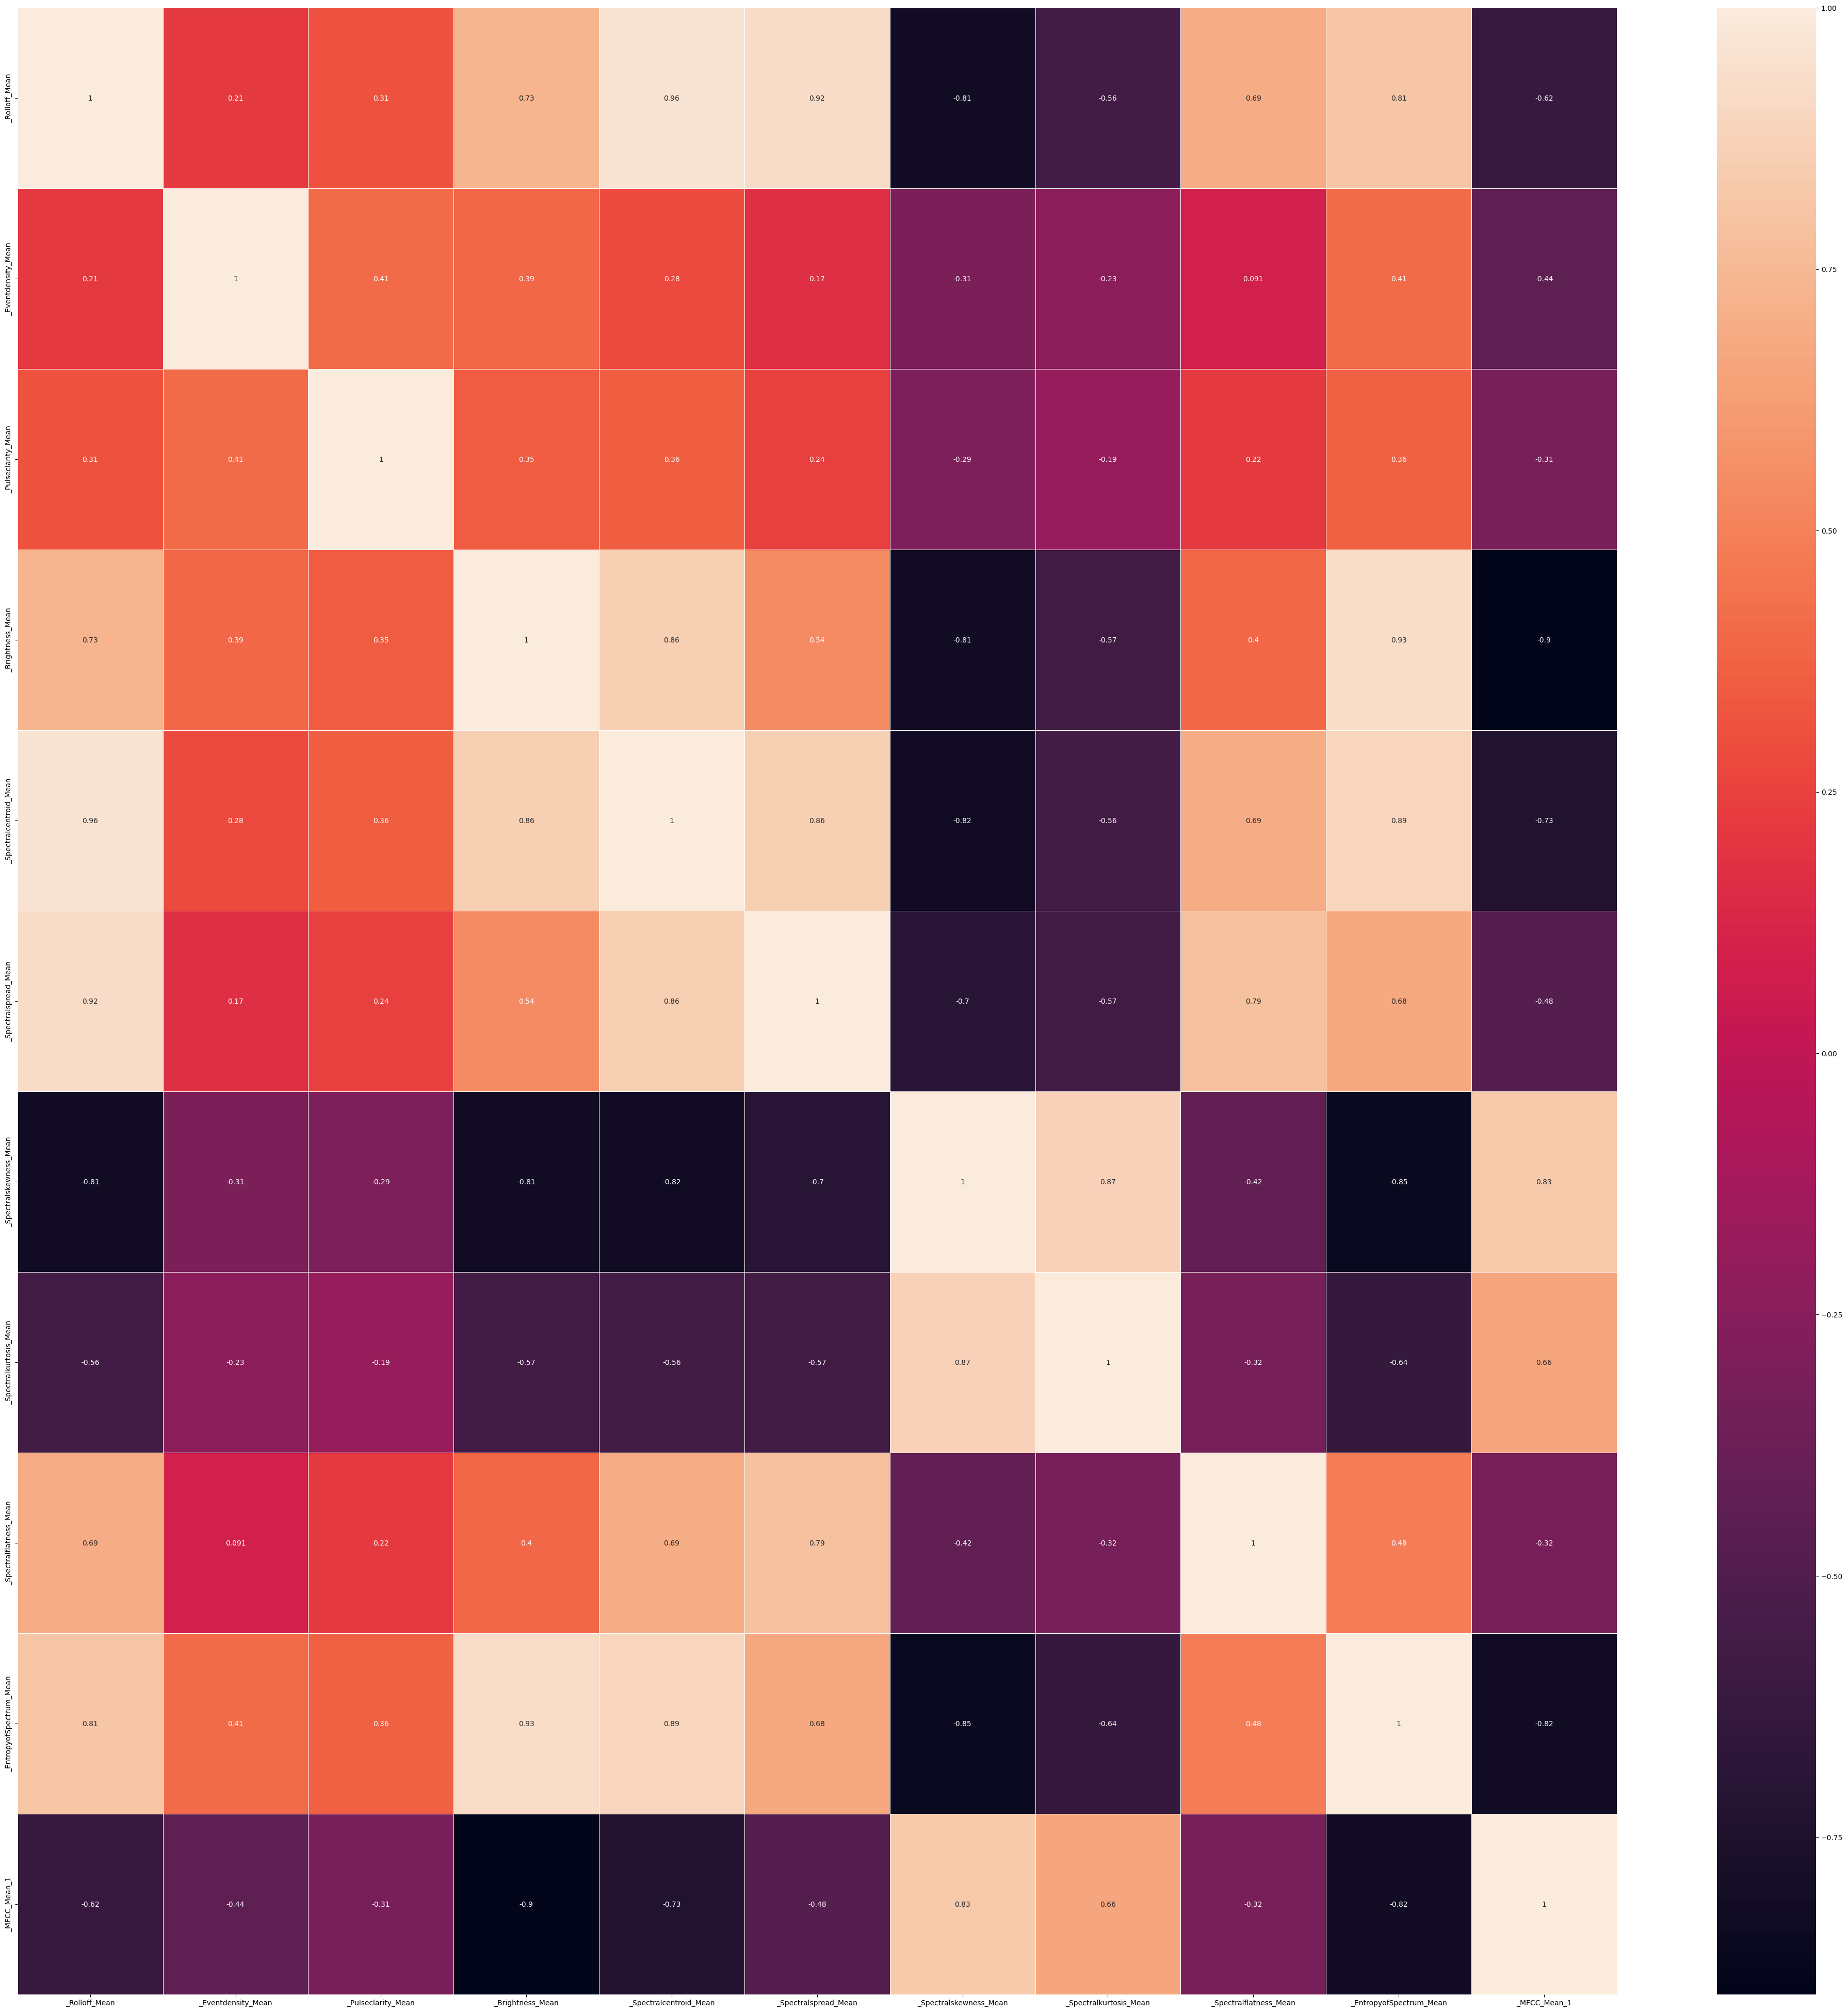

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

data = X[['_Rolloff_Mean','_Eventdensity_Mean','_Pulseclarity_Mean','_Brightness_Mean','_Spectralcentroid_Mean','_Spectralspread_Mean','_Spectralskewness_Mean','_Spectralkurtosis_Mean','_Spectralflatness_Mean','_EntropyofSpectrum_Mean','_MFCC_Mean_1']]
matrix = data.corr(method='pearson')
plt.figure(figsize=(50,50))
sns.heatmap(matrix, annot=True,linewidths=.5)
plt.show()

In [19]:
trial = X[['_Rolloff_Mean','_Brightness_Mean','_Spectralcentroid_Mean','_Spectralspread_Mean','_Spectralskewness_Mean','_Spectralkurtosis_Mean','_EntropyofSpectrum_Mean','_MFCC_Mean_1']]
result = do_pca(trial,1)

In [20]:
X_with_PCA = X.drop(['_Rolloff_Mean','_Brightness_Mean','_Spectralcentroid_Mean','_Spectralspread_Mean','_Spectralskewness_Mean','_Spectralkurtosis_Mean','_EntropyofSpectrum_Mean','_MFCC_Mean_1'],axis=1)
X_with_PCA["PCA_Val"] = result

In [21]:
X_with_PCA

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,_MFCC_Mean_7,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,PCA_Val
0,-1.272863,0.724549,0.910332,0.184485,0.533531,1.342709,0.176184,0.194331,0.383737,-1.159007,...,1.143513,-1.063516,-0.825846,-0.221041,1.447311,0.166633,-0.794990,-2.447998,0.849226,-4.910212
1,-0.141269,-2.270546,-0.198455,0.542841,0.817391,0.998348,1.320472,1.910184,3.700735,-2.543376,...,1.143513,-1.088927,1.695816,-0.779237,0.384200,-0.791482,1.701411,-0.935784,0.074540,-6.073207
2,-1.365871,1.670369,1.561337,1.891824,1.535389,0.042915,1.076549,0.532379,0.490894,-1.680892,...,0.435849,-1.038105,1.741509,1.525571,2.255275,1.278046,-0.101486,-1.074519,-0.958374,3.065147
3,0.013743,0.961004,1.499939,-1.697403,2.739475,0.414284,1.155465,-0.881279,0.505506,-0.071288,...,1.143513,-0.577529,1.047552,1.687627,1.532360,0.396581,-1.524938,-0.366969,0.332769,-0.242623
4,-1.055845,0.724549,1.196106,-1.024616,0.283066,1.096254,0.240752,1.285306,1.197156,0.241843,...,-0.516990,2.087458,-1.111424,0.301142,1.447311,0.846895,-1.102619,-1.324242,-2.507745,-2.510837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.618294,0.468390,-0.837272,1.098253,-0.019347,0.772150,0.061397,0.419696,0.315546,0.758234,...,0.692168,0.222920,-0.757307,-0.094997,-1.125418,1.143910,0.980038,1.353348,0.590997,-0.765846
396,0.649296,-1.107976,-0.937947,1.645996,-0.414524,-0.497260,-0.143068,-0.789084,-0.001054,0.027595,...,1.143513,0.943959,-1.085722,-1.715565,-1.401827,1.383439,1.701411,1.519830,0.074540,2.820960
397,0.819810,0.054594,-1.081512,0.301685,0.910155,1.319076,-0.508954,0.312135,0.851331,1.197716,...,-1.129927,-0.177304,-0.825846,-1.067338,-0.763960,1.057680,1.701411,0.687419,-1.216602,1.796603
398,0.091250,0.369867,-1.196183,-0.298621,-0.529552,0.691124,0.215643,0.117501,0.110973,0.620896,...,1.143513,-0.123306,-0.714470,-0.923287,-1.040369,0.578622,1.701411,0.576431,0.590997,0.401799


Berikut fitur yang memiliki korelasi tinggi terhadap target:

In [38]:
X_with_PCA.columns

Index(['_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_2', '_MFCC_Mean_3', '_MFCC_Mean_4',
       '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7', '_MFCC_Mean_8',
       '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11', '_MFCC_Mean_12',
       '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Eventdensity_Mean', '_Pulseclarity_Mean', '_Spectralflatness_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12',
       '_HarmonicChangeDetectionFunction_Mean',
       '_HarmonicChangeDetectionFunction_Std',
       '_HarmonicChangeDetectionFunction_Slope',
       '_HarmonicChangeDetectionFunction_PeriodFreq',
       '_Ha

## Train

In [23]:
# Convert data to trainable dimension
x_train = X_with_PCA.values[:,np.newaxis,:]
y_train = y.values[:,np.newaxis,:]

Dengan struktur NN yang sama dengan uji coba sebelumnya (3 layer):

In [24]:
# network
net = NeuralNetwork()
net.add(FCLayer(43,32))
net.add(ActivationLayer(relu,relu_derivative))
net.add(FCLayer(32,4))
net.add(ActivationLayer(softmax,softmax_derivative))

print(x_train)
print(y_train)
# train
net.use(categorical_crossentropy, categorical_crossentropy_derivative)
net.train(x_train, y_train, epochs=100, learning_rate=0.1)
# test
#out = net.predict(x_train)
#print(out)

[[[-1.27286325  0.72454933  0.91033152 ... -2.44799769  0.84922559
   -4.91021173]]

 [[-0.14126944 -2.27054575 -0.19845525 ... -0.93578353  0.07454018
   -6.07320666]]

 [[-1.36587096  1.67036883  1.56133744 ... -1.07451877 -0.95837371
    3.06514713]]

 ...

 [[ 0.81981023  0.05459386 -1.08151181 ...  0.68741883 -1.21660218
    1.79660299]]

 [[ 0.09124983  0.36986702 -1.19618276 ...  0.57643064  0.59099712
    0.401799  ]]

 [[-0.74581956 -1.56118112 -0.80205782 ...  1.08975104 -0.44191676
   -1.71896606]]]
[[[False False  True False]]

 [[False False  True False]]

 [[False False  True False]]

 ...

 [[ True False False False]]

 [[ True False False False]]

 [[ True False False False]]]
epoch 1100 error = 0.163971
epoch 2100 error = 2.185551
epoch 3100 error = 1.473851
epoch 4100 error = 2.203431
epoch 5100 error = 2.512614
epoch 6100 error = 2.478228
epoch 7100 error = 2.461333
epoch 8100 error = 2.461333
epoch 9100 error = 2.461333
epoch 10100 error = 2.461333
epoch 11100 error